<h1>Initialization</h1>

<h2>Load modules and some utilities</h2>

In [11]:
%matplotlib inline
from sklearn.datasets import fetch_california_housing 
from sklearn import cross_validation
import matplotlib.pylab as plt
import numpy as np

plt.rcParams['figure.figsize'] = (8.0, 8.0)

houses = fetch_california_housing ()

downloading Cal. housing from http://lib.stat.cmu.edu/modules.php?op=modload&name=Downloads&file=index&req=getit&lid=83 to /Users/rsabatini/scikit_learn_data


<h2>Data inspection</h2>

We inspect the data, checking for features and eventually to remove some. 

In [12]:
houses.data.shape, houses.target.shape

((20640, 8), (20640,))

In [13]:
zip(houses.feature_names, houses.data[0])

[('MedInc', 8.3252000000000006),
 ('HouseAge', 41.0),
 ('AveRooms', 6.9841269841269842),
 ('AveBedrms', 1.0238095238095237),
 ('Population', 322.0),
 ('AveOccup', 2.5555555555555554),
 ('Latitude', 37.880000000000003),
 ('Longitude', -122.23)]

<h2>Plotting</h2>
As a regression dataset, we can plot price histogram or the dependence of any feature with respect to the target price.

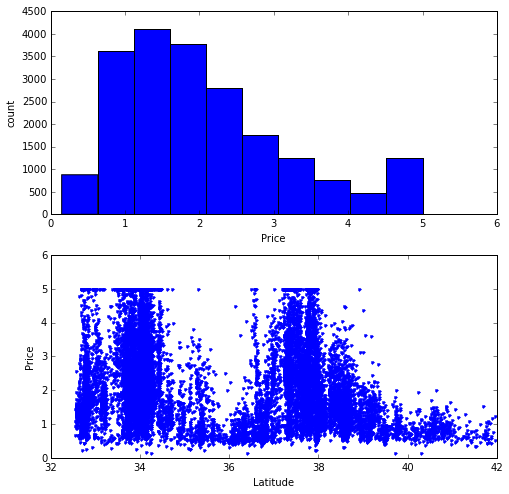

In [14]:
plt.subplot(2, 1, 1)
plt.hist(houses.target)
plt.xlabel('Price')
plt.ylabel('count')

feature_n = 6
plt.subplot(2, 1, 2)
plt.plot(houses.data[:,feature_n], houses.target, '.')
plt.xlabel(houses.feature_names[feature_n])
plt.ylabel('Price')

<h2>Data preparation (train/test)</h2>

We split the database in a training and a testing part.

In [15]:
from sklearn import cross_validation

train_x, test_x, train_y , test_y = cross_validation.train_test_split(houses.data, houses.target, test_size=0.2)

<h1>Linear regression</h1>

<h2>Load and training</h2>
We load a linear regression model and we train it.

In [30]:
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#clf = SVR(C=0.9, epsilon=0.11)
clf = LinearRegression()
clf.fit(train_x, train_y)
predicted = clf.predict(test_x)

<h2>Plot results and metrics</h2>
We can plot the results versus the real value, and test the R-square metric

R-square: 0.61869391079


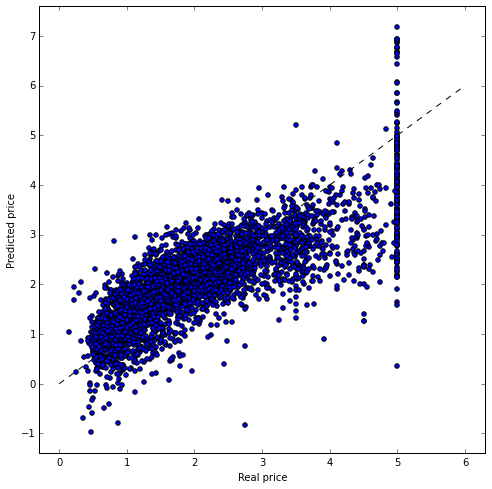

In [31]:
plt.scatter(test_y, predicted)
plt.plot([0, 6], [0, 6], '--k')
plt.axis('tight')
plt.xlabel('Real price')
plt.ylabel('Predicted price')

R2 = r2_score(test_y, predicted)
print "R-square: {0}".format(R2)

<h1>Ridge regression with cross validation</h1>

<h2>Load and training</h2>
The model has an internal cross-validation routine to adjust the ridge.

In [32]:
from sklearn import linear_model

clf = linear_model.RidgeCV(alphas=[0.1, 1.0, 10.0])
clf.fit(train_x, train_y)
predicted = clf.predict(test_x)

r2_score(test_y, predicted)

0.61867443045282844